<a href="https://colab.research.google.com/github/Adithya007-Dev/ML_21BAI1863_Fall2022_23/blob/main/21BAI1863_LR_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd

In [4]:
df = pd.read_csv("/content/Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [5]:
df.shape

(99, 9)

In [6]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [8]:
df_enc = pd.get_dummies(df,columns=["Soil Type","Crop Type"])
df_enc

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,37,0,0,Urea,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,DAP,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,14-35-14,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,28-28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,Urea,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,28-28,0,1,0,...,0,0,0,0,0,0,1,0,0,0
95,30,60,27,4,17,17,10-26-26,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,38,72,51,39,0,0,Urea,0,0,1,...,0,0,0,0,0,0,0,0,0,1
97,36,60,43,15,0,41,DAP,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
df_enc.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061,0.191919,0.202020,0.212121,0.191919,...,0.121212,0.070707,0.060606,0.111111,0.070707,0.101010,0.101010,0.131313,0.070707,0.090909
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978,0.395814,0.403551,0.410891,0.395814,...,0.328035,0.257639,0.239821,0.315869,0.257639,0.302876,0.302876,0.339461,0.257639,0.288943
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [11]:
X=df_enc.drop('Fertilizer Name',axis=1)
X

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
95,30,60,27,4,17,17,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
96,38,72,51,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
97,36,60,43,15,0,41,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
Y=df_enc["Fertilizer Name"]
Y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [13]:
Y.unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

<Axes: xlabel='Fertilizer Name', ylabel='count'>

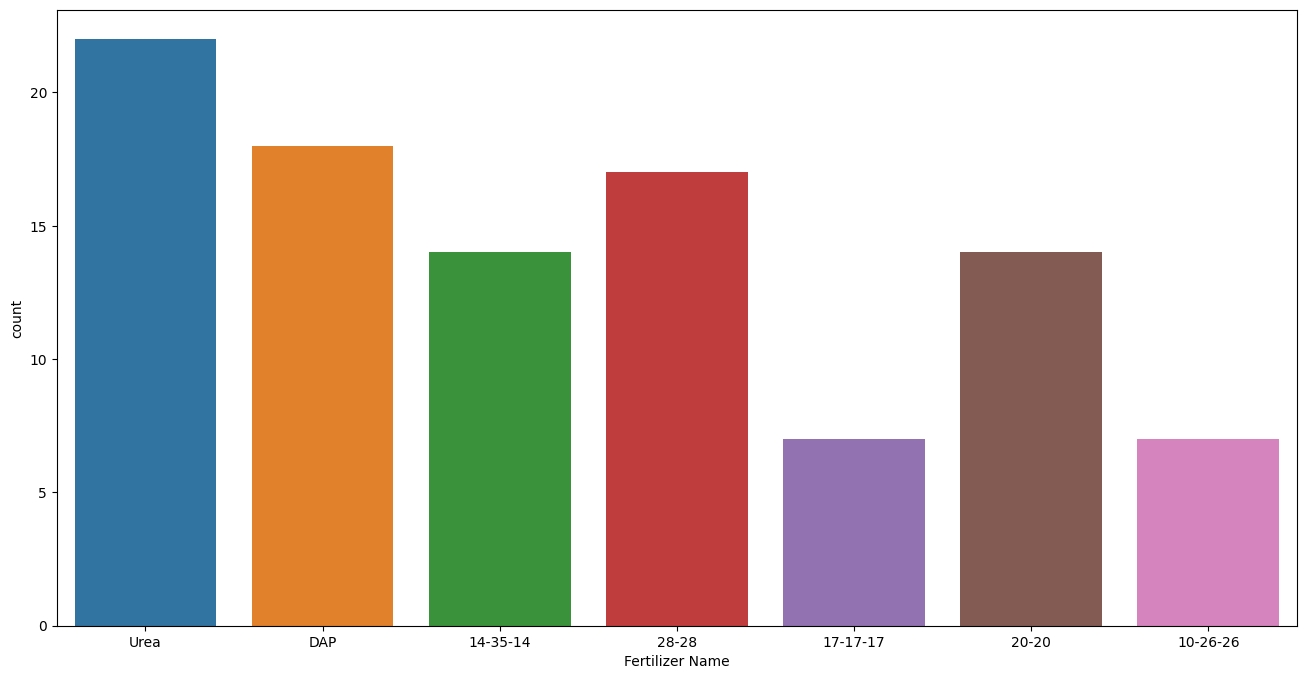

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

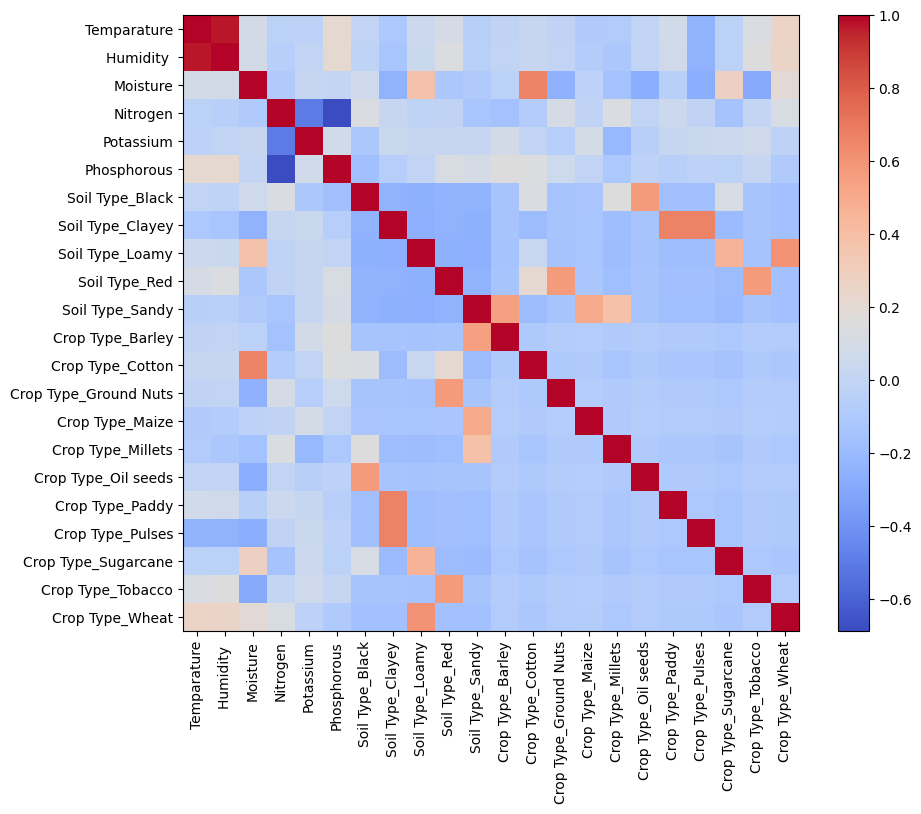

In [15]:
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=42)

In [17]:
X_train.shape

(79, 22)

In [18]:
X_test.shape

(20, 22)

In [19]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# X_train

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [21]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print("Accuracy is " + str(acc*100) + " percent")


Accuracy is 100.0 percent


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy ", knn_accuracy*100 ," percent")

KNN Accuracy  90.0  percent


In [25]:
import pickle

with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [26]:
with open('logreg_model.pkl', 'rb') as file:
    loaded_logreg_model = pickle.load(file)

with open('knn_model.pkl', 'rb') as file:
    loaded_knn_model = pickle.load(file)